### Дисклеймер

Часть графиков и таблиц преднамеренно опущены с целью экономии времени ревьюера.

С той же целью опущена модель LinearRegression - она показала сильно худшие результаты, нежели RandomForestRegressor.

### Подключение библиотек и скриптов

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2

matplotlib.rcParams.update({'font.size': 14})
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
def reduce_mem_usage(df):    
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem)),
    for col in df.columns:
        col_type = df[col].dtype
   
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    plt.figure(figsize=(10, 4))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')
    
    plt.show()

### Пути к директориям и файлам

In [3]:
TRAIN_DATASET_PATH = 'data/train.csv'
TEST_DATASET_PATH = 'data/test.csv'

### Загрузка данных и приведение типов

In [4]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
train_df = reduce_mem_usage(train_df)
train_df.head()

Memory usage of dataframe is 1.53 MB
Memory usage after optimization is: 0.49 MB
Decreased by 68.1%


,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027313,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.875000
1,3013,22,1.0,39.832523,23.169222,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.546875
2,8215,1,3.0,78.342216,47.671970,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.718750
3,2352,1,1.0,40.409908,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.000000
4,13866,94,2.0,64.285065,38.562515,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.093750


In [5]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df = reduce_mem_usage(test_df)

Memory usage of dataframe is 0.72 MB
Memory usage after optimization is: 0.22 MB
Decreased by 70.3%


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             10000 non-null  int16   
 1   DistrictId     10000 non-null  int16   
 2   Rooms          10000 non-null  float32 
 3   Square         10000 non-null  float32 
 4   LifeSquare     7887 non-null   float32 
 5   KitchenSquare  10000 non-null  float32 
 6   Floor          10000 non-null  int8    
 7   HouseFloor     10000 non-null  float32 
 8   HouseYear      10000 non-null  int32   
 9   Ecology_1      10000 non-null  float32 
 10  Ecology_2      10000 non-null  category
 11  Ecology_3      10000 non-null  category
 12  Social_1       10000 non-null  int8    
 13  Social_2       10000 non-null  int16   
 14  Social_3       10000 non-null  int16   
 15  Healthcare_1   5202 non-null   float32 
 16  Helthcare_2    10000 non-null  int8    
 17  Shops_1        10000 non-null  i

In [7]:
train_df = train_df.drop('Id', axis = 1)
train_df = train_df.drop('DistrictId', axis = 1)
test_df = test_df.drop('Id', axis = 1)
test_df = test_df.drop('DistrictId', axis = 1)

### Обзор данных

Text(0.5, 1.0, 'Target distribution')

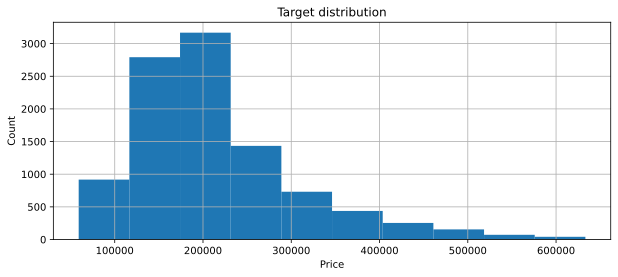

In [8]:
plt.figure(figsize = (10, 4))
train_df['Price'].hist()
plt.ylabel('Count')
plt.xlabel('Price')
plt.title('Target distribution')

#### Количественные переменные

In [9]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315720,37.199665,6.273300,8.526700,12.6094,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904419,1.319500,4.231300,214138.937500
std,0.839522,21.058716,86.241219,28.560839,5.241148,6.7762,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.519470,1.493601,4.806341,92872.273438
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.0000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,1.000000,41.774879,22.769833,1.000000,4.000000,9.0000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.628906
50%,2.000000,52.513309,32.781261,6.000000,7.000000,13.0000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.648438
75%,2.000000,65.900627,45.128803,9.000000,12.000000,17.0000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.460938
max,19.000000,641.065186,7480.592285,2014.000000,42.000000,117.0000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.437500


#### Качественные переменные

In [10]:
train_df.select_dtypes(include='category').columns.tolist()

['Ecology_2', 'Ecology_3', 'Shops_2']

In [11]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

Фича малозначима, можно удалить.

In [12]:
train_df = train_df.drop('Ecology_2', axis = 1)
test_df = test_df.drop('Ecology_2', axis = 1)

In [13]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

Фича малозначима, можно удалить.

In [14]:
train_df = train_df.drop('Ecology_3', axis = 1)
test_df = test_df.drop('Ecology_3', axis = 1)

In [15]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

In [16]:
shops_2 = {'Shops_2':     {'A': 0, 'B': 1}}
train_df = train_df.replace(shops_2)
train_df['Shops_2'] = train_df['Shops_2'].astype(int)
test_df = test_df.replace(shops_2)
test_df['Shops_2'] = test_df['Shops_2'].astype(int)

### Обработка пропусков

In [17]:
train_df.isna().sum()

Rooms               0
Square              0
LifeSquare       2113
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [18]:
test_df.isna().sum()

Rooms               0
Square              0
LifeSquare       1041
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     2377
Helthcare_2         0
Shops_1             0
Shops_2             0
dtype: int64

#### LifeSquare

In [19]:
mean_lifesquare = train_df['Healthcare_1'].mean()
train_df['LifeSquare'].fillna(mean_lifesquare, inplace = True)
test_df['LifeSquare'].fillna(mean_lifesquare, inplace = True)

#### Healthcare_1

In [20]:
train_df['Healthcare_1'].value_counts()

540.0     511
30.0      348
1046.0    245
750.0     163
229.0     148
         ... 
370.0      14
32.0       12
1815.0     10
35.0        2
0.0         1
Name: Healthcare_1, Length: 79, dtype: int64

In [21]:
mean_helth_1 = train_df['Healthcare_1'].mean()
train_df['Healthcare_1'].fillna(mean_helth_1, inplace = True)
test_df['Healthcare_1'].fillna(mean_helth_1, inplace = True)

### Обработка выбросов

#### Rooms

In [22]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [23]:
median_rooms = train_df['Rooms'].median()
train_df.loc[train_df['Rooms'] == 0, 'Rooms'] = median_rooms
train_df.loc[train_df['Rooms'] > 6, 'Rooms'] = median_rooms
test_df.loc[test_df['Rooms'] == 0, 'Rooms'] = median_rooms
test_df.loc[test_df['Rooms'] > 6, 'Rooms'] = median_rooms

#### Square, LifeSquare, KitchenSquare

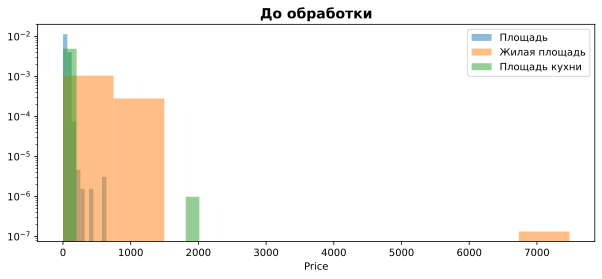

In [24]:
plt.figure(figsize=(10, 4))
plt.hist(x=train_df.Square, density=True, alpha=0.5, label='Площадь')
plt.hist(x=train_df.LifeSquare, density=True, alpha=0.5, label='Жилая площадь')
plt.hist(x=train_df.KitchenSquare, density=True, alpha=0.5, label='Площадь кухни')
plt.yscale(value='log')
plt.xlabel('Price')
plt.legend()
plt.title('До обработки', fontweight='bold', fontsize=14)
plt.show()

##### Square

In [25]:
train_df['Square'].value_counts().sort_index(ascending=True)

1.136859      1
1.988943      1
2.377248      1
2.596351      1
2.954309      1
             ..
212.932358    1
275.645294    1
409.425171    1
604.705994    1
641.065186    1
Name: Square, Length: 9995, dtype: int64

In [26]:
train_df.loc[train_df['Square'] < 20, 'Square'] = 20
train_df.loc[train_df['Square'] > 200, 'Square'] = 200
test_df.loc[test_df['Square'] < 20, 'Square'] = 20
test_df.loc[test_df['Square'] > 200, 'Square'] = 200

##### KitchenSquare

In [27]:
train_df['KitchenSquare'].value_counts().sort_index(ascending=True)

0.0        697
1.0       2460
2.0          4
3.0         22
4.0         39
5.0       1169
6.0       1038
7.0        609
8.0       1306
9.0        843
10.0      1075
11.0       233
12.0       249
13.0        67
14.0        51
15.0        31
16.0        16
17.0        12
18.0         6
19.0        11
20.0        14
21.0         1
22.0         3
23.0         1
25.0         2
26.0         1
27.0         1
29.0         1
30.0         2
31.0         1
32.0         2
35.0         1
36.0         1
37.0         2
39.0         1
40.0         1
41.0         2
42.0         1
43.0         2
48.0         1
51.0         2
53.0         1
54.0         1
58.0         2
60.0         1
62.0         1
63.0         1
66.0         1
72.0         1
73.0         1
75.0         1
78.0         1
84.0         1
96.0         1
112.0        2
123.0        1
1970.0       1
2014.0       1
Name: KitchenSquare, dtype: int64

In [28]:
median_kitchen = train_df['KitchenSquare'].median()
train_df.loc[train_df['KitchenSquare'] < 6, 'KitchenSquare'] = median_kitchen
train_df.loc[train_df['KitchenSquare'] > 20, 'KitchenSquare'] = median_kitchen
train_df.loc[train_df['KitchenSquare'] > train_df['Square'] , 'KitchenSquare'] = train_df['Square'] - 10
test_df.loc[test_df['KitchenSquare'] < 6, 'KitchenSquare'] = median_kitchen
test_df.loc[test_df['KitchenSquare'] > 20, 'KitchenSquare'] = median_kitchen
test_df.loc[test_df['KitchenSquare'] > test_df['Square'] , 'KitchenSquare'] = test_df['Square'] - 10

##### LifeSquare

In [29]:
ls_train = train_df['Square'] - train_df['KitchenSquare']
train_df['LifeSquare'].fillna(ls_train, inplace = True)
train_df.loc[train_df['LifeSquare'] > ls_train, 'LifeSquare'] = ls_train
train_df.loc[train_df['LifeSquare'] < 8, 'LifeSquare'] = ls_train
ls_test = test_df['Square'] - test_df['KitchenSquare']
test_df['LifeSquare'].fillna(ls_test, inplace = True)
test_df.loc[test_df['LifeSquare'] > ls_test, 'LifeSquare'] = ls_test
test_df.loc[test_df['LifeSquare'] < 8, 'LifeSquare'] = ls_test

In [30]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.888800,56.223286,40.069424,7.456800,8.526700,12.6094,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.939941,1.319500,4.231300,0.917500,214138.937500
std,0.812107,19.179222,18.643057,2.043736,5.241148,6.7762,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,736.732849,1.493601,4.806341,0.275139,92872.273438
min,1.000000,20.000000,8.822989,6.000000,1.000000,0.0000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.777344
25%,1.000000,41.774879,26.794594,6.000000,4.000000,9.0000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,830.000000,0.000000,1.000000,1.000000,153872.628906
50%,2.000000,52.513309,35.388248,6.000000,7.000000,13.0000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,1142.904419,1.000000,3.000000,1.000000,192269.648438
75%,2.000000,65.900627,48.695151,9.000000,12.000000,17.0000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1142.904419,2.000000,6.000000,1.000000,249135.460938
max,6.000000,200.000000,194.000000,20.000000,42.000000,117.0000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.437500


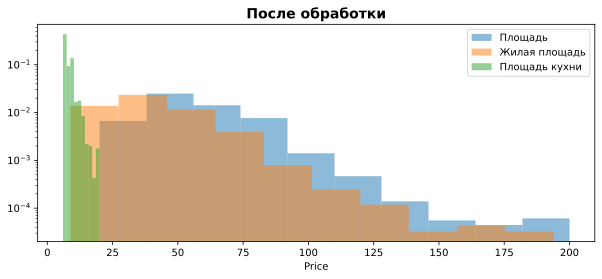

In [31]:
plt.figure(figsize=(10, 4))
plt.hist(x=train_df.Square, density=True, alpha=0.5, label='Площадь')
plt.hist(x=train_df.LifeSquare, density=True, alpha=0.5, label='Жилая площадь')
plt.hist(x=train_df.KitchenSquare, density=True, alpha=0.5, label='Площадь кухни')
plt.yscale(value='log')
plt.xlabel('Price')
plt.legend()
plt.title('После обработки', fontweight='bold', fontsize=14)
plt.show()

### Построение модели RandomForestRegressor

In [32]:
train_df.keys()

Index(['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
       'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [33]:
features = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
       'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Shops_2']
x = train_df[features]
y = train_df['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [34]:
forest = RandomForestRegressor(random_state=42)
forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

Train R2:	0.962
Test R2:	0.741


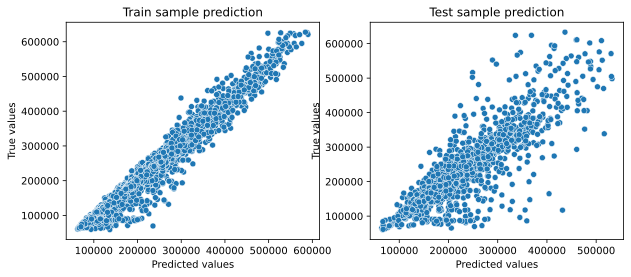

In [35]:
train_pred = forest.predict(x_train)
test_pred = forest.predict(x_test)
evaluate_preds(y_train, train_pred, y_test, test_pred)

### Итоговое предсказание

In [36]:
forest = RandomForestRegressor(random_state=42)
forest.fit(x, y)

RandomForestRegressor(random_state=42)

In [37]:
pred = pd.DataFrame(forest.predict(test_df), columns=['Price'])
test_reload = pd.read_csv(TEST_DATASET_PATH)
test_reload['Price'] = pred
fin_pred = test_reload[['Id', 'Price']]

#### Запись в файл

In [38]:
fin_pred.to_csv('SZaichenko_predictions.csv', index = False)